### Da capo

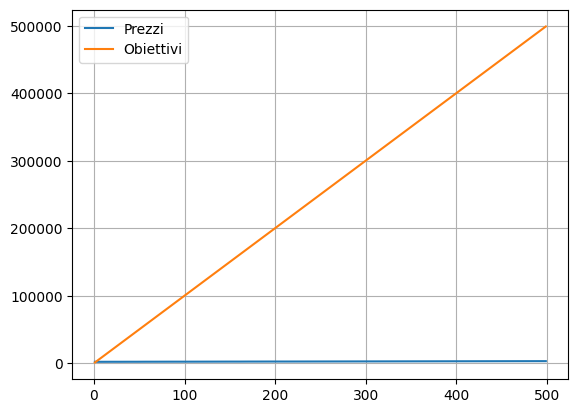

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Dev'essere sempre positivo e magari strettamente!
def prezzo(t):
    # if t%4 == 0:
    #     return 50 + t
    # elif t%4 == 1:
    #     return 100 + t
    # elif t%4 == 2:
    #     return 200 + t
    # elif t%4 == 3:
    #     return 100 + t
    return 2000 + 2*t + 20*math.cos(t) # (math.cos(t)+2.1)/(t+1) #abs(1000 * math.cos(t) + t ** 2) + 1

step = 1
limite = 500
tempi = np.arange(step, limite, step)
prezzi = np.array([prezzo(t) for t in tempi])

bitcoin_YP = 0
bitcoin_YP_in_dollari = 0
deposito_iniziale = 1000
deposito_YP = 0
liquidità = 0
prezzo_attuale = prezzo(0)

dollari_in_banca = 100000
perc_tassa_acquisto = 0.002
liquidità_ist = 0
liquidità_cumulativa = 0
ricarica_cumulativa = 0
tasse_pagate_ist = 0
tasse_pagate = 0
obiettivo_cumulativo = 0

# Variabili
strategia_VA = True
investimento_base = 0 # Quanti $ di bitcoin compro il primo giorno; è anche la soglia per sapere se ritirare l'eccesso dei soldi
tempo_acquisto_VA = 100 # Ogni quante "volte" faccio in modo di comprare (o eventualmente vendere se vendita_VA = True) bitcoin in modo che il totale valga quanto stabilito dall'obiettivo di quella volta (ad esempio potrei avere come obiettivo il secondo giorno 200$, il terzo giorno 300$ e così via)
quantità_VA = 1000 # ogni tempo_acquisto_VA giorni compro bitcoin in $ pari al valore che serve per avere quantità_VA $ in più rispetto alla volta precedente (in particolare tempo_acquisto_VA giorni prima); quindi inizialmente ho bitcoin con valore quantità_VA $, poi tempo_acquisto_VA giorni dopo ne avrò in modo che valgano 2*quantità_VA $, poi tempo_acquisto_VA giorni dopo avrò 3*quantità_VA $ e così via
vendita_VA = False # se è True, significa che è possibile anche che si venda nel caso in cui il valore obiettivo del portafoglio di quel giorno debba essere inferiore a quello che in realtà ho già; se invece è False, in un caso del genere non si fa niente

obiettivo = quantità_VA
obiettivi = np.array([obiettivo * t for t in tempi])

plt.plot(tempi, prezzi, label = 'Prezzi')
plt.plot(tempi, obiettivi, label = 'Obiettivi')
plt.grid(True)
plt.legend()
plt.show()

In [77]:
tempi = np.insert(tempi,0,0)
prezzi = np.insert(prezzi,0,prezzo(0))

In [78]:
dati = pd.DataFrame()

In [79]:
dati['Data'] = tempi
dati['Prezzo bitcoin in $'] = + prezzi

In [80]:
dati

,Data,Prezzo bitcoin in $
0,0,2020.000000
1,1,2012.806046
2,2,1995.677063
3,3,1986.200150
4,4,1994.927128
...,...,...
495,495,2993.956862
496,496,3010.634666
497,497,3010.179844
498,498,2994.849348


In [81]:
tabella_finale = dati.copy()
tabella_finale['Deposito su YP in $'] = 0
tabella_finale['Deposito su YP + liquidità cumulativa in $'] = 0
tabella_finale['Bitcoin su YP'] = 0
tabella_finale['Bitcoin su YP in $'] = 0
tabella_finale['Ritiro per strategia Giacomo in $'] = 0
tabella_finale['Vendita effettuata'] = False
tabella_finale['Liquidità istantanea'] = 0
tabella_finale['Liquidità cumulativa'] = 0
tabella_finale['Obiettivo'] = '-' # La popolo successivamente
tabella_finale['Obiettivo "cumulativo"'] = 0 # La popolo successivamente
tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'] = 0
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'] = 0
tabella_finale['Ricarica istantanea per VA'] = 0
tabella_finale['Ricarica cumulativa per VA'] = 0
tabella_finale['Tasse pagate istantanee'] = 0
tabella_finale['Tasse pagate cumulative'] = 0

In [82]:
def bitcoin_in_dollari(bitcoin, prezzo_bitcoin):
    return bitcoin * prezzo_bitcoin

def dollari_in_bitcoin(dollari, prezzo_bitcoin):
    return dollari / prezzo_bitcoin

In [83]:
# Ricarica iniziale del deposito di YP
dollari_in_banca -= deposito_iniziale
deposito_YP += deposito_iniziale

In [84]:
# Acquisto bitcoin su YP per la prima volta, prima di cominciare il ciclo con le mie strategie
deposito_YP -= investimento_base * (1 + perc_tassa_acquisto)
bitcoin_YP += dollari_in_bitcoin(investimento_base, prezzo_attuale)
# print('Prezzo attuale:', prezzo_attuale)
# print('bitcoin_YP', bitcoin_YP)
bitcoin_YP_in_dollari += investimento_base
tasse_pagate_ist = perc_tassa_acquisto * investimento_base
tasse_pagate += perc_tassa_acquisto * investimento_base
# bitcoin_YP_in_dollari += investimento_base # In realtà lo faccio già dopo, durante il ciclo for

tabella_finale['Deposito su YP in $'][0] = deposito_YP
tabella_finale['Deposito su YP + liquidità cumulativa in $'][0] = deposito_YP + liquidità_cumulativa
tabella_finale['Bitcoin su YP'][0] = bitcoin_YP
tabella_finale['Bitcoin su YP in $'][0] = bitcoin_YP_in_dollari
tabella_finale['Ritiro per strategia Giacomo in $'][0] = 0
tabella_finale['Vendita effettuata'][0] = False
tabella_finale['Liquidità istantanea'][0] = liquidità_ist
tabella_finale['Liquidità cumulativa'][0] = liquidità_cumulativa
tabella_finale['Obiettivo'][0] = 0
tabella_finale['Obiettivo "cumulativo"'][0] = 0
tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'][0] = 0
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
tabella_finale['Ricarica istantanea per VA'][0] = 0
tabella_finale['Ricarica cumulativa per VA'][0] = ricarica_cumulativa
tabella_finale['Tasse pagate istantanee'][0] = tasse_pagate_ist
tabella_finale['Tasse pagate cumulative'][0] = tasse_pagate

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\3895027146.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito su YP in $'][0] = deposito_YP
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\3895027146.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito su YP + liquidità cumulativa in $'][0] = deposito_YP + liquidità_cumulativa
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\3895027146.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [85]:
prezzo_attuale

2020.0

In [86]:
0.3%0.1

0.09999999999999998

In [87]:
for ind, t in enumerate(dati['Data'][1:]):
        # print(tasse_pagate)
        liquidità_ist = 0
        prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][ind+1]
        # print('Prezzo attuale:', prezzo_attuale)
        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
        # print(bitcoin_YP_in_dollari)

        
        if (ind+1) % tempo_acquisto_VA == 0: # Se è un giorno in cui voglio comprare altri bitcoin
                obiettivo = quantità_VA * (ind+1) // tempo_acquisto_VA
                obiettivo_cumulativo += quantità_VA
                # print('Obiettivo:', obiettivo)
                ricarica = obiettivo - bitcoin_YP_in_dollari
                # print('Ricarica:', ricarica)
                # print('Bitcoin YP', bitcoin_YP)
                # print('Bitcoin YP in $', bitcoin_YP_in_dollari)
                liquidità = quantità_VA - ricarica
                if liquidità >= 0 and liquidità <= quantità_VA:
                        if deposito_YP >= liquidità: # correzzione aggiunta tardi
                                deposito_YP -= liquidità
                                # liquidità_ist = liquidità
                                liquidità_cumulativa += liquidità
                elif liquidità > quantità_VA:
                        if deposito_YP >= quantità_VA: # correzzione aggiunta tardi
                                deposito_YP -= quantità_VA
                                # liquidità_ist = quantità_VA
                                liquidità_cumulativa += quantità_VA
                # Questo else è superfluo perchè il fondo liquidità è già 0 di base, inoltre aggiungere 0 è come non fare nulla, ma lo lascio per chiarezza
                # else:
                #         liquidità_ist = 0
                #         liquidità_cumulativa += 0

                if ricarica >= 0:
                        # Se non ci sono abbastanza soldi nel deposito, prendo tutto dal deposito e quello che manca dalla liquidità accumulata
                        if ricarica * (1 + perc_tassa_acquisto) <= deposito_YP:
                                deposito_YP -= ricarica * (1 + perc_tassa_acquisto)
                                tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                tabella_finale['Tasse pagate istantanee'][ind+1] = tasse_pagate_ist
                                tasse_pagate += perc_tassa_acquisto * ricarica
                        else:
                                liquidità_cumulativa -= ricarica * (1 + perc_tassa_acquisto) - deposito_YP
                                deposito_YP = 0
                                tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                tabella_finale['Tasse pagate istantanee'][ind+1] = tasse_pagate_ist
                                tasse_pagate += perc_tassa_acquisto * ricarica
                        bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale)
                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                        ricarica_cumulativa += ricarica
                        tabella_finale['Ricarica istantanea per VA'][ind+1] = ricarica
                elif vendita_VA:
                        tabella_finale['Vendita effettuata'][ind+1] = True
                        deposito_YP -= ricarica * (1 - perc_tassa_acquisto) # aumenta il deposito perchè qui ricarica è negativa; poi ci sono le tasse anche sulla vendita
                        tasse_pagate_ist = -perc_tassa_acquisto * ricarica
                        tabella_finale['Tasse pagate istantanee'][ind+1] = tasse_pagate_ist
                        tasse_pagate -= perc_tassa_acquisto * ricarica # anche qui è importante ricordare il "-" perchè ricarica è negativa
                        bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale) # calano perchè qui ricarica è negativa
                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                tabella_finale['Obiettivo'][ind+1] = obiettivo
                        
        
                                
        tabella_finale['Deposito su YP in $'][ind+1] = deposito_YP
        tabella_finale['Deposito su YP + liquidità cumulativa in $'][ind+1] = deposito_YP + liquidità_cumulativa
        tabella_finale['Bitcoin su YP'][ind+1] = bitcoin_YP
        tabella_finale['Bitcoin su YP in $'][ind+1] = bitcoin_YP_in_dollari
        tabella_finale['Liquidità istantanea'][ind+1] = liquidità_ist
        tabella_finale['Liquidità cumulativa'][ind+1] = liquidità_cumulativa
        tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][ind+1] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
        tabella_finale['Ricarica cumulativa per VA'][ind+1] = ricarica_cumulativa
        tabella_finale['Tasse pagate cumulative'][ind+1] = tasse_pagate
        tabella_finale['Obiettivo "cumulativo"'][ind+1] = obiettivo_cumulativo
        tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'][ind+1] = obiettivo_cumulativo - bitcoin_YP_in_dollari

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\2304453236.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito su YP in $'][ind+1] = deposito_YP
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\2304453236.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito su YP + liquidità cumulativa in $'][ind+1] = deposito_YP + liquidità_cumulativa
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\2304453236.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\2304453236.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Tasse pagate istantanee'][ind+1] = tasse_pagate_ist
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\2304453236.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Ricarica istantanea per VA'][ind+1] = ricarica
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_61460\2304453236.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

<h6> Analisi post calcolo </h6>

In [88]:
ind

498

In [89]:
max_delta_neg = 0
max_delta_pos = 0
guadagno_finale = 0

In [90]:
ind_neg = 'Nessuno'
ind_pos = 'Nessuno'

for index, i in enumerate(tabella_finale['Deposito su YP + liquidità cumulativa in $']):
    if deposito_iniziale - i > max_delta_neg:
        max_delta_neg = deposito_iniziale - i
        ind_neg = index

    if i - deposito_iniziale > max_delta_pos:
        max_delta_pos = i - deposito_iniziale
        ind_pos = index

In [91]:
print(max_delta_neg, max_delta_pos)
print(ind_neg, ind_pos)
if max_delta_neg > tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0]:
    print(f"ATTENZIONE! IL DEPOSITO INIZIALE NON è SUFFICIENTE! CARICARE ALMENO DI {max_delta_neg}")

3543.5214908882504 0
400 Nessuno
ATTENZIONE! IL DEPOSITO INIZIALE NON è SUFFICIENTE! CARICARE ALMENO DI 3543.5214908882504


In [92]:
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $']

0      1000.000000
1      1000.000000
2      1000.000000
3      1000.000000
4      1000.000000
          ...     
495    1749.668290
496    1773.583457
497    1772.931263
498    1750.948071
499    1730.481863
Name: Deposito + bitcoin su YP + liquidità cumulativa in $, Length: 500, dtype: float64

In [93]:
guadagno_finale = tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][len(tabella_finale) - 1] - tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0]
print(guadagno_finale)

730.4818627141308


In [94]:
guadagno_finale - max_delta_neg

-2813.0396281741196

In [95]:
tasse_pagate

7.072897187401697

In [96]:
tabella_finale[ind_neg:ind_neg+1]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative
400,400,2789.494073,0,-2543.521491,1.433952,4000.0,0,False,0,-2543.521491,4000,4000,-4.547474e-13,1456.478509,780.805813,3536.448594,1.561612,7.072897


<h6> Tabelle </h6>

In [97]:
tabella_finale[tabella_finale['Liquidità istantanea'] > 0]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative


In [98]:
tabella_finale[tabella_finale['Ricarica istantanea per VA'] > 0]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative
100,100,2217.246377,0,-2.000000,0.451010,1000.0,0,False,0,-2.000000,1000,1000,0.000000e+00,998.000000,1000.000000,1000.000000,2.000000,2.000000
200,200,2409.743754,0,-917.008147,0.829964,2000.0,0,False,0,-917.008147,2000,2000,0.000000e+00,1082.991853,913.181783,1913.181783,1.826364,3.826364
300,300,2599.558068,0,-1761.154066,1.154042,3000.0,0,False,0,-1761.154066,3000,3000,0.000000e+00,1238.845934,842.460997,2755.642781,1.684922,5.511286
400,400,2789.494073,0,-2543.521491,1.433952,4000.0,0,False,0,-2543.521491,4000,4000,-4.547474e-13,1456.478509,780.805813,3536.448594,1.561612,7.072897


In [99]:
tabella_finale

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative
0,0,2020.000000,1000,1000.000000,0.000000,0.000000,0,False,0,0.000000,0,0,0.000000,1000.000000,0.0,0.000000,0.0,0.000000
1,1,2012.806046,1000,1000.000000,0.000000,0.000000,0,False,0,0.000000,-,0,0.000000,1000.000000,0.0,0.000000,0.0,0.000000
2,2,1995.677063,1000,1000.000000,0.000000,0.000000,0,False,0,0.000000,-,0,0.000000,1000.000000,0.0,0.000000,0.0,0.000000
3,3,1986.200150,1000,1000.000000,0.000000,0.000000,0,False,0,0.000000,-,0,0.000000,1000.000000,0.0,0.000000,0.0,0.000000
4,4,1994.927128,1000,1000.000000,0.000000,0.000000,0,False,0,0.000000,-,0,0.000000,1000.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2993.956862,0,-2543.521491,1.433952,4293.189781,0,False,0,-2543.521491,-,4000,-293.189781,1749.668290,0.0,3536.448594,0.0,7.072897
496,496,3010.634666,0,-2543.521491,1.433952,4317.104948,0,False,0,-2543.521491,-,4000,-317.104948,1773.583457,0.0,3536.448594,0.0,7.072897
497,497,3010.179844,0,-2543.521491,1.433952,4316.452754,0,False,0,-2543.521491,-,4000,-316.452754,1772.931263,0.0,3536.448594,0.0,7.072897
498,498,2994.849348,0,-2543.521491,1.433952,4294.469562,0,False,0,-2543.521491,-,4000,-294.469562,1750.948071,0.0,3536.448594,0.0,7.072897


### Grafico

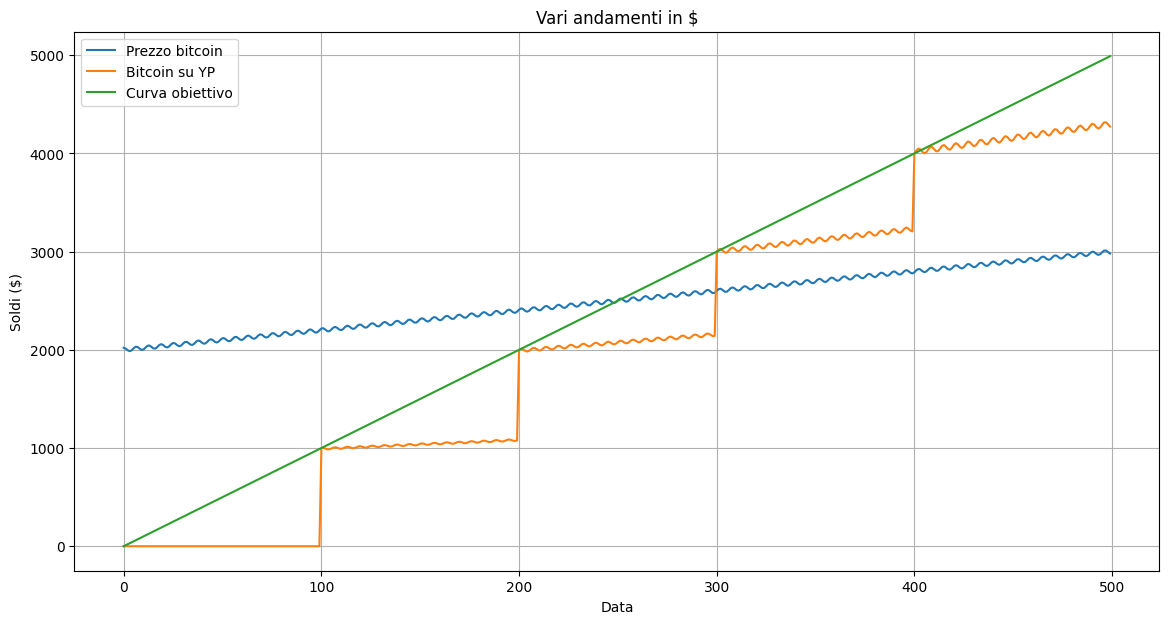

In [100]:
x = tabella_finale['Data']
y = tabella_finale['Deposito su YP + liquidità cumulativa in $']
z = tabella_finale['Prezzo bitcoin in $']
w = tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $']
# h = tabella_finale['Ritiro per strategia Giacomo in $']
j = tabella_finale['Bitcoin su YP in $']
k = tabella_finale['Liquidità cumulativa']
l = tabella_finale['Obiettivo "cumulativo"']
m = tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $']
n = tabella_finale['Ricarica cumulativa per VA']
plt.figure(figsize=(14, 7))
# plt.plot(x, y, label=f"Deposito su YP + liquidità cumulativa", color='blue')
plt.plot(x, z, label=f"Prezzo bitcoin")
# plt.plot(x, w, label=f"Deposito + bitcoin su YP + liquidità cumulativa", color='green')
# plt.plot(x, h, label=f"Ritiro per strategia Giacomo", color='pink')
plt.plot(x, j, label=f"Bitcoin su YP")
# plt.plot(x, k, label=f"Liquidità cumulativa", color='purple')
# plt.plot(x, l, label=f'Obiettivo "cumulativo"', color='orange')
# plt.plot(x, m, label=f'Obiettivo "cumulativo" - bitcoin su YP', color='brown')
# plt.plot(x, n, label=f"Ricarica cumulativa per VA", color='red')

plt.plot(x, 10*x, label=f"Curva obiettivo")

plt.title('Vari andamenti in $')
plt.xlabel('Data')
plt.ylabel('Soldi ($)')
plt.legend()
plt.grid(True)
plt.show()